In [3]:
import awkward as ak
import hist
import numpy as np
import vector
import os

import pylhe

In [58]:
import seaborn as sns
colors = sns.color_palette("colorblind", 8)

In [1]:
def read_sigma_nevents(dirname):
    filename = dirname + dirname.split('/')[-2]+'_tag_1_banner.txt'
    with open(filename,'r') as f:
        data = f.readlines()
    f.close()
    sigma = float(data[-4].split(' ')[-1])
    nevents = float(data[-5].split(' ')[-1])
    return sigma, nevents

## directories for ttbar and ttbarax

In [4]:
dir_ttbarax = os.path.expanduser('~/Documents/MadGraph/ALPtt/Events/run_08/')
dir_ttbar = os.path.expanduser('~/Documents/MadGraph/ppttleptonic/Events/run_02/')

## ttbarax

In [5]:
pylhe.register_awkward()
arr = pylhe.to_awkward(pylhe.read_lhe_with_attributes("../ALPtt/Events/run_08/unweighted_events.lhe"))

In [5]:
f = open("../ALPtt/Events/run_08/unweighted_events.lhe", "r")
content = f.readlines()
f.close() 

line = content[443]
sigma = float(line.split(" ")[0]) # cross section in pb
print(sigma)

0.0001978536


In [8]:
lumi = 13.3e3 #luminosity in inverse picobars

In [9]:
sigma_ax, nevents_ax = read_sigma_nevents(os.path.expanduser(dir_ttbarax))
ww_ax = sigma_ax*lumi/nevents_ax

### particle positions:
electron e- (11): position 10,
positron e+ (-11): position 7,
b quark b (5): position 6,
anti-b quark b~: position 9 

In [13]:
deltaR1 = arr.particles.vector[:,6].deltaR(arr.particles.vector[:,7])
deltaR2 = arr.particles.vector[:,9].deltaR(arr.particles.vector[:,10])
deltaR3 = arr.particles.vector[:,6].deltaR(arr.particles.vector[:,10])
deltaR4 = arr.particles.vector[:,9].deltaR(arr.particles.vector[:,7])

In [14]:
print(deltaR1)
print(deltaR2)
print(deltaR3)
print(deltaR4)

[3.84, 0.782, 3.05, 1.66, 1.08, 2.23, 0.281, ... 2.01, 2.04, 2.88, 1.43, 2.82, 1.72]
[2.37, 1.04, 1.68, 2.62, 1.87, 0.461, 3.36, ... 2.62, 3.4, 1.83, 1.56, 1.42, 2.03]
[2.76, 3.11, 4.17, 2.66, 2.79, 3.22, 2.86, ... 0.884, 2.97, 5.17, 1.83, 2.3, 2.27]
[2.89, 3.03, 0.729, 3.99, 2.75, 2.59, 0.666, ... 3.57, 2.29, 1.25, 2.68, 1.56, 1.85]


In [20]:
deltaR = np.zeros(int(nevents_ax));
for i in range(0,int(nevents_ax),1):
    deltaR[i] = min(deltaR1[i], deltaR2[i], deltaR3[i], deltaR4[i])
    

In [21]:
print(deltaR)

[2.36655464 0.78226812 0.72926834 ... 1.43421611 1.42392797 1.71662062]


## SM: ttbar

In [22]:
pylhe.register_awkward()
arr_b = pylhe.to_awkward(pylhe.read_lhe_with_attributes("../ppttleptonic/Events/run_02/unweighted_events.lhe"))

In [23]:
deltaR1_b = arr.particles.vector[:,6].deltaR(arr_b.particles.vector[:,7])
deltaR2_b = arr.particles.vector[:,9].deltaR(arr_b.particles.vector[:,10])
deltaR3_b = arr.particles.vector[:,6].deltaR(arr_b.particles.vector[:,10])
deltaR4_b = arr.particles.vector[:,9].deltaR(arr_b.particles.vector[:,7])

In [24]:
deltaR_b = np.zeros(int(nevents_sm));
for i in range(0,int(nevents_sm),1):
    deltaR_b[i] = min(deltaR1_b[i], deltaR2_b[i], deltaR3_b[i], deltaR4_b[i])

In [39]:
sigma_sm, nevents_sm = read_sigma_nevents(os.path.expanduser(dir_ttbar))
ww_sm = sigma_sm*lumi/nevents_sm

# produce histogram

In [25]:
num_bins = 30
max_bins = 5

In [54]:
axis1 = hist.axis.Regular(bins=num_bins, start=0, stop=max_bins, name="deltaR")
storage = hist.storage.Weight()
hist1 = hist.Hist(axis1, storage=storage)
hist1.fill(deltaR, weight = 1e8*ww_ax);

In [55]:
axis2 = hist.axis.Regular(bins=num_bins, start=0, stop=max_bins, name="deltaR")
storage = hist.storage.Weight()
hist2 = hist.Hist(axis2, storage=storage)
hist2.fill(deltaR_b, weight = ww_sm);

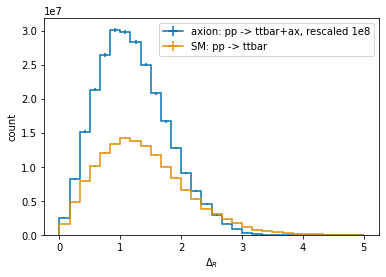

In [60]:
artists1 = hist1.plot1d(label = 'axion: pp -> ttbar+ax, rescaled 1e8', color = colors[0]);
artist2 = hist2.plot1d(label = 'SM: pp -> ttbar', color = colors[1])
ax = artists1[0].stairs.axes;
ax.set_yscale("linear");
ax.set_xlabel("$\Delta_R$");
ax.set_ylabel("count");
ax.legend()